<h2>Loading Librosa for single mp3 analysis</h2>
Can change the file to process by changing audio_path

In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

audio_path = 'edm/born_mitiS.mp3'
x , sr = librosa.load(audio_path, sr=44100)

print(type(x), type(sr))

print(x.shape, sr)

<h2>Mel Spectrogram</h2>

The first visualization used was a spectrogram, which aids in visualizing the the spectrums of frequencies in a song over time as well as its volume in decibels. The frequencies were converted using the mel-scale, which is standard in music visualization (therefore making these mel-spectrograms).

In [ ]:
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,
                                  fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,                                              ref=np.max),
                      y_axis='mel', fmax=8000,
                      x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Dr. Dre - Still D.R.E. (Rap)')
plt.tight_layout()


<h2>Spectral Centroid</h2>

The spectral centroid indicates the centre of gravity of the audio spectrum. This gives the brightness of a sound. A high spectral centroid value will correspond with brighter textures and higher frequencies.

In [ ]:
#spectral centroid
from sklearn import preprocessing
import numpy as np
spectral_centroidzzz = librosa.feature.spectral_centroid(x, sr=sr)[0]

spectral_centroidzzz = np.reshape(spectral_centroidzzz, (-1, 1))

frames = range(len(spectral_centroidzzz))
time = librosa.frames_to_time(frames)

fig =plt.figure()
fig.suptitle('MitiS - Born (EDM)')
#plot spectral centroid
idx = int(4e6)
librosa.display.waveplot(x[:idx], sr=sr, alpha=0.4)


plt.plot(time[:idx], preprocessing.minmax_scale(spectral_centroidzzz)[:idx], color='r')

#print(np.mean(spectral_centroidzzz))

<h2>Chroma Frequencies</h2>
‘Chroma Frequencies’ partitions the audio wave into discrete chromatic keys (12 note scale). Extracting this feature helps describe things such as chord progressions and over all keys of the song.

In [ ]:
#CHROMA FREQUENCIES

x_harm = librosa.effects.harmonic(y=x, margin=8)

#smooth local neaightest neibhor
chroma_os_harm = librosa.feature.chroma_cqt(y=x_harm, sr=sr, bins_per_octave=12*3)

#filter harmonic transients
chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))

#zoom in only section of song
idx = tuple([slice(None), slice(*list(librosa.time_to_frames([45, 120])))])



fig =plt.figure()
fig.suptitle('Pachelbel''s Canon in D (Classical)')


librosa.display.specshow(chroma_filter[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Notes')


<h2>Mel-Frequency Cepstral Coefficients (MFCCs).</h2>
This is a representation of the short-term power spectrum of a sound. It is similar to chroma frequencies in that it classifies the “note” of a sound but adds more texture information instead of completely discretizing the sound. It was originally used for speech recognition but other research has used mfccs in combination with choma frequencies to classify music and we will do the same

In [ ]:
#MFCCS

mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:

fig =plt.figure()
fig.suptitle('MitiS - Born (EDM)')


librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f Hz')

<h2>Zero Crossing</h2>
Zero Crossing Rate just counts the number of times the waveform crosses the origin at 0

In [ ]:
zero_crossings = np.mean(librosa.zero_crossings(x))

print(zero_crossings)

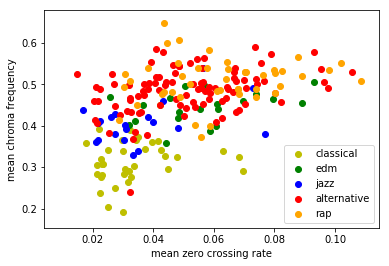

In [2]:


#classical
zcr_classical = list(data[data.genre == 'classical']['zero crossing rate'])
specCentroid_classical = list(data[data.genre == 'classical']['chroma'])

#edm
zcr_edm = list(data[data.genre == 'edm']['zero crossing rate'])
specCentroid_edm = list(data[data.genre == 'edm']['chroma'])

#jazz
zcr_jazz = list(data[data.genre == 'jazz']['zero crossing rate'])
specCentroid_jazz = list(data[data.genre == 'jazz']['chroma'])


#alternative
zcr_alt = list(data[data.genre == 'alternative']['zero crossing rate'])
specCentroid_alt = list(data[data.genre == 'alternative']['chroma'])

#rap
zcr_rap = list(data[data.genre == 'westcoastrap']['zero crossing rate'])
specCentroid_rap = list(data[data.genre == 'westcoastrap']['chroma'])


plt.scatter(zcr_classical, specCentroid_classical, c='y')
plt.scatter(zcr_edm, specCentroid_edm, c='g')
plt.scatter(zcr_jazz, specCentroid_jazz, c='b')
plt.scatter(zcr_alt, specCentroid_alt, c='r')
plt.scatter(zcr_rap, specCentroid_rap, c='orange')
plt.xlabel('mean zero crossing rate')
plt.ylabel('mean chroma frequency')

plt.legend(['classical', 'edm', 'jazz', 'alternative', 'rap'],loc=4)